<a href="https://colab.research.google.com/github/awbasit/Rocks-Classification/blob/main/Rocks_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
filepath = '/content/rocks.xlsx'
data = pd.read_excel(filepath)
data.head()

,LITHOLOGY,MgO,Al2O3,SiO2,P,S,K2O,Ca,Ti,V,...,Ag,Sn,Sb,Ba,La,Ce,Pb,Bi,Th,U
0,QUARTZ MLO-001,-3.413859,-3.413859,2.586133,-2.112829,-3.413859,-0.608358,-1.185972,-0.903314,-3.413859,...,-2.237767,-2.334677,-2.635707,-1.822794,-3.413859,-3.112829,-2.936737,-3.112829,-3.112829,-3.413859
1,QUARTZ MLO-001,-3.413859,-0.063998,2.586141,-2.635707,-3.413859,-0.651180,-1.246541,-0.899311,-3.413859,...,-2.209739,-2.209739,-2.413859,-1.550536,-2.510769,-3.413859,-3.413859,-3.413859,-3.112829,-3.413859
2,QUARTZ MLO-001,-3.413859,-0.721893,2.586141,-2.936737,-3.413859,-0.620767,-1.215201,-0.906003,-3.413859,...,-2.267731,-2.209739,-3.112829,-1.643007,-2.413859,-3.413859,-2.714889,-3.413859,-2.936737,-3.413859
3,QUARTZ MLO-001,-3.413859,-0.475839,2.586141,-3.413859,-3.413859,-0.619370,-1.212461,-0.896663,-3.413859,...,-2.209739,-2.299915,-2.334677,-1.665671,-2.459616,-2.237767,-2.811799,-3.413859,-2.936737,-3.413859
4,QUARTZ MLO-001,-3.413859,-0.186229,2.586141,-3.413859,-3.413859,-0.659510,-1.252491,-0.897985,-3.413859,...,-2.112829,-2.091639,-2.112829,-1.635707,-2.510769,-2.635707,-3.112829,-3.413859,-3.112829,-3.413859


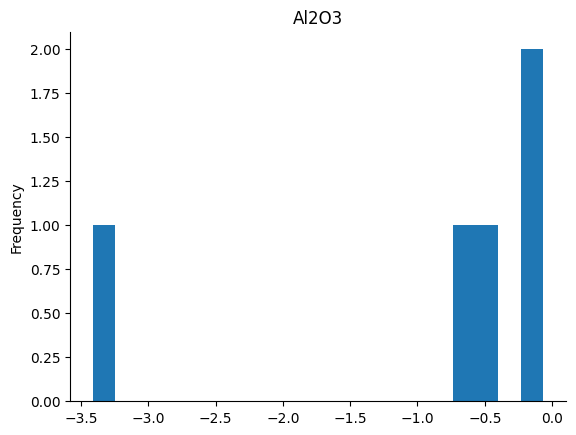

In [ ]:

_df_1['Al2O3'].plot(kind='hist', bins=20, title='Al2O3')
plt.gca().spines[['top', 'right',]].set_visible(False)

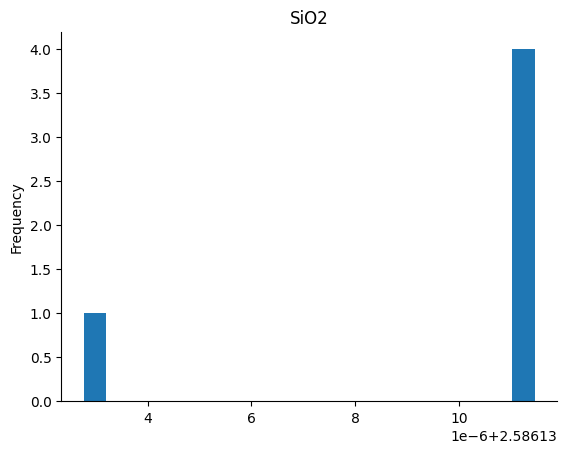

In [ ]:

_df_2['SiO2'].plot(kind='hist', bins=20, title='SiO2')
plt.gca().spines[['top', 'right',]].set_visible(False)

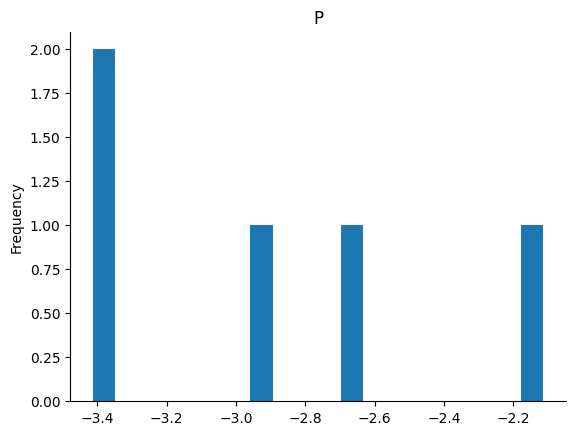

In [ ]:
_df_3['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data.shape

(10215, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10215 entries, 0 to 10214
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LITHOLOGY  10215 non-null  object 
 1   MgO        10215 non-null  float64
 2   Al2O3      10215 non-null  float64
 3   SiO2       10215 non-null  float64
 4   P          10215 non-null  float64
 5   S          10215 non-null  float64
 6   K2O        10215 non-null  float64
 7   Ca         10215 non-null  float64
 8   Ti         10215 non-null  float64
 9   V          10215 non-null  float64
 10  Cr         10215 non-null  float64
 11  Mn         10215 non-null  float64
 12  Fe         10215 non-null  float64
 13  Co         10215 non-null  float64
 14  Ni         10215 non-null  float64
 15  Cu         10215 non-null  float64
 16  Zn         10215 non-null  float64
 17  As         10215 non-null  float64
 18  Se         10215 non-null  float64
 19  Rb         10215 non-null  float64
 20  Sr    

In [ ]:
data.describe()

,MgO,Al2O3,SiO2,P,S,K2O,Ca,Ti,V,Cr,...,Ag,Sn,Sb,Ba,La,Ce,Pb,Bi,Th,U
count,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,...,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000
mean,-0.326757,0.958756,1.471087,-0.763835,-1.293379,0.270227,0.071587,-0.234943,-1.286615,-0.679155,...,-2.257590,-2.324468,-2.581104,-0.779776,-2.630871,-2.257681,-2.869818,-2.146013,-2.017504,-2.895499
std,1.561018,0.659128,0.830074,0.974229,1.197061,0.518028,0.667761,0.385999,1.007664,0.349458,...,0.174292,0.165623,0.329362,0.529576,0.458418,0.537249,0.369228,1.053958,1.022536,0.426817
min,-3.413860,-3.413859,0.000120,-3.413859,-3.413859,-0.659510,-1.277138,-0.984106,-3.413859,-1.392669,...,-2.568761,-2.635707,-3.413859,-2.183410,-3.413859,-3.413859,-3.413859,-3.413859,-3.413859,-3.413859
25%,0.056868,0.426468,0.742597,-0.636224,-1.856636,0.058554,0.046646,-0.508091,-1.646032,-0.985525,...,-2.390022,-2.451916,-2.797321,-0.705648,-3.023212,-2.666754,-3.169812,-3.096731,-2.953701,-3.319902
50%,0.330253,0.922561,1.487034,-0.341672,-0.827633,0.367468,0.273118,-0.052086,-1.018039,-0.746263,...,-2.267649,-2.323914,-2.541151,-0.603534,-2.633512,-2.176358,-2.929152,-2.427314,-2.267668,-2.939950
75%,0.607788,1.412175,2.236495,-0.173134,-0.360860,0.660414,0.514363,0.051737,-0.522587,-0.377579,...,-2.148908,-2.209739,-2.314996,-0.485851,-2.251567,-1.818048,-2.680578,-1.255830,-1.129498,-2.599766
max,0.969831,3.006472,2.586141,-0.000019,-0.000122,1.112326,0.975892,0.185479,-0.000287,-0.000127,...,-1.741761,-1.895345,-2.033647,-0.293285,-1.657984,-1.280320,-2.135105,-0.000027,-0.000291,-2.112829


In [ ]:
# Preprocessing: Separate features (X) from the target (y)
X = data.drop(columns=['LITHOLOGY'])  # Features
y = data['LITHOLOGY']  # Target

In [ ]:
noise = np.random.normal(0, 0.1, X.shape)  # Adding Gaussian noise to the features
X_noisy = X + noise  # Adding noise to the feature data

In [ ]:
selector = SelectKBest(f_classif, k=10)  # Selecting the top 10 features
X_selected = selector.fit_transform(X_noisy, y)  # Applying feature selection

In [ ]:
selector.get_support(indices=True)  # Getting the indices of the selected features

array([ 0,  3,  4,  6,  7, 18, 19, 20, 21, 27])

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)  # Scaling the features to zero mean and unit variance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)  # Splitting the data into training and testing sets

In [ ]:
# Function to train and evaluate the models
def train_evaluate(model, model_name, param_grid=None):
    """
    Trains the given model, evaluates it using cross-validation, and prints the results.
    If a param_grid is provided, it uses GridSearchCV to find the best hyperparameters.
    """
    if param_grid:
        # If hyperparameter tuning is required, perform GridSearchCV with the specified parameters
        # Why? GridSearch helps find the best combination of hyperparameters for the model, reducing overfitting.
        # Benefit: Finding optimal hyperparameters can balance model complexity and performance.
        grid_search = GridSearchCV(model, param_grid, cv=15, scoring='accuracy')  # 15-fold cross-validation
        grid_search.fit(X_train, y_train)  # Train model using GridSearch
        model = grid_search.best_estimator_  # Use the best model found
        best_score = grid_search.best_score_  # Best cross-validation score
    else:
        # If no param_grid is given, perform simple cross-validation
        # Why? Cross-validation helps evaluate model performance on multiple data splits.
        # Benefit: More reliable estimate of model performance and helps reduce overfitting by not relying on a single train-test split.
        cv_scores = cross_val_score(model, X_train, y_train, cv=15)  # Perform 15-fold cross-validation
        best_score = np.mean(cv_scores)  # Average cross-validation score
        model.fit(X_train, y_train)  # Train the model on the full training data

    # Predict the target labels on the test set after training
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    class_rep = classification_report(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    disp.plot()
    plt.show()


    # Print model performance: Cross-validation accuracy and test set accuracy
    print(f"{model_name}:")
    print(f"Best Cross-validation Accuracy: {best_score:.4f}" if param_grid else f"Cross-validation Accuracy: {best_score:.4f}")
    print(f"Test Set Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(class_rep)
    print(f"Confusion Matrix Display: {disp}")
    print("-" * 50)


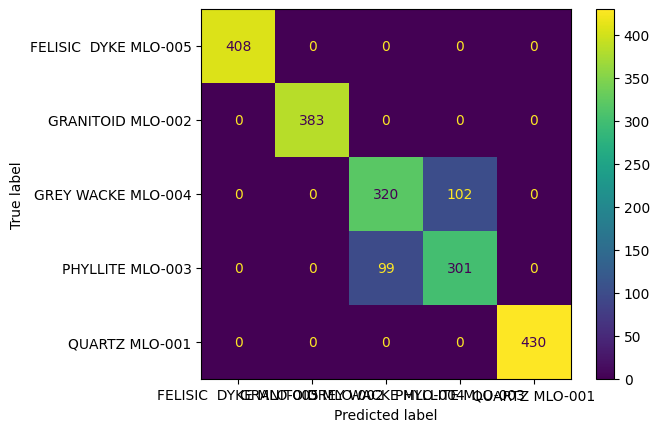

SVM:
Best Cross-validation Accuracy: 0.9028
Test Set Accuracy: 0.9016
Classification Report:
                       precision    recall  f1-score   support

FELISIC  DYKE MLO-005       1.00      1.00      1.00       408
    GRANITOID MLO-002       1.00      1.00      1.00       383
   GREY WACKE MLO-004       0.76      0.76      0.76       422
     PHYLLITE MLO-003       0.75      0.75      0.75       400
       QUARTZ MLO-001       1.00      1.00      1.00       430

             accuracy                           0.90      2043
            macro avg       0.90      0.90      0.90      2043
         weighted avg       0.90      0.90      0.90      2043

Confusion Matrix Display: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x797eb1dffdf0>
--------------------------------------------------


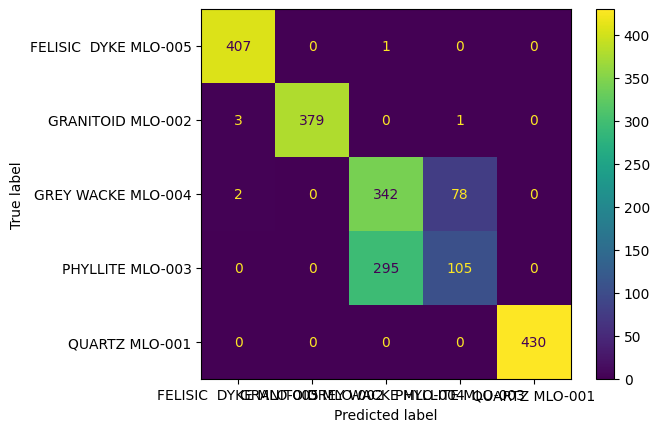

AdaBoost:
Best Cross-validation Accuracy: 0.8060
Test Set Accuracy: 0.8140
Classification Report:
                       precision    recall  f1-score   support

FELISIC  DYKE MLO-005       0.99      1.00      0.99       408
    GRANITOID MLO-002       1.00      0.99      0.99       383
   GREY WACKE MLO-004       0.54      0.81      0.65       422
     PHYLLITE MLO-003       0.57      0.26      0.36       400
       QUARTZ MLO-001       1.00      1.00      1.00       430

             accuracy                           0.81      2043
            macro avg       0.82      0.81      0.80      2043
         weighted avg       0.82      0.81      0.80      2043

Confusion Matrix Display: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x797eb110c790>
--------------------------------------------------


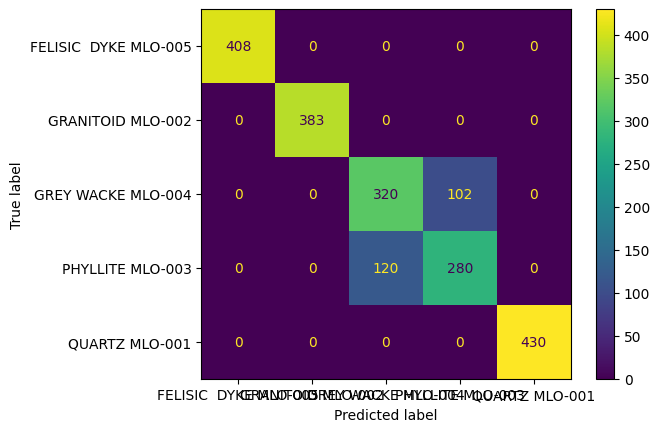

Gradient Boosting:
Best Cross-validation Accuracy: 0.8988
Test Set Accuracy: 0.8913
Classification Report:
                       precision    recall  f1-score   support

FELISIC  DYKE MLO-005       1.00      1.00      1.00       408
    GRANITOID MLO-002       1.00      1.00      1.00       383
   GREY WACKE MLO-004       0.73      0.76      0.74       422
     PHYLLITE MLO-003       0.73      0.70      0.72       400
       QUARTZ MLO-001       1.00      1.00      1.00       430

             accuracy                           0.89      2043
            macro avg       0.89      0.89      0.89      2043
         weighted avg       0.89      0.89      0.89      2043

Confusion Matrix Display: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x797eb1fed900>
--------------------------------------------------


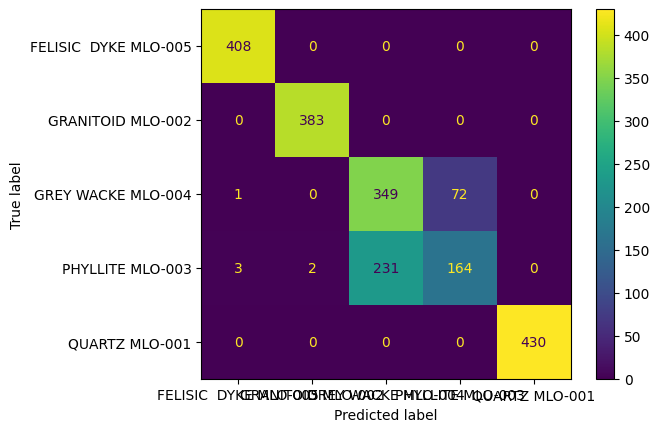

Random Forest:
Best Cross-validation Accuracy: 0.8558
Test Set Accuracy: 0.8488
Classification Report:
                       precision    recall  f1-score   support

FELISIC  DYKE MLO-005       0.99      1.00      1.00       408
    GRANITOID MLO-002       0.99      1.00      1.00       383
   GREY WACKE MLO-004       0.60      0.83      0.70       422
     PHYLLITE MLO-003       0.69      0.41      0.52       400
       QUARTZ MLO-001       1.00      1.00      1.00       430

             accuracy                           0.85      2043
            macro avg       0.86      0.85      0.84      2043
         weighted avg       0.86      0.85      0.84      2043

Confusion Matrix Display: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x797eb17291e0>
--------------------------------------------------


In [ ]:
# Initialize the models with reduced complexity to avoid overfitting
# Why? Simplifying models (e.g., fewer estimators, lower depth) reduces the likelihood of overfitting by limiting model capacity.
# Benefit: Reduced complexity ensures that the model focuses on general patterns rather than noise or specific details in the training data.
models = {
    "SVM": SVC(C=1.0, kernel='linear', gamma='scale'),  # SVM with linear kernel for simplicity (reduces complexity)
    "AdaBoost": AdaBoostClassifier(n_estimators=5, learning_rate=0.5),  # AdaBoost with reduced estimators to avoid overfitting
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=10, learning_rate=0.01, max_depth=1),  # Shallow Gradient Boosting
    "Random Forest": RandomForestClassifier(n_estimators=10, max_depth=2, min_samples_split=30, min_samples_leaf=10, random_state=42)  # Shallow Random Forest
}

# Parameter grids for hyperparameter tuning using GridSearchCV
# Why? Tuning hyperparameters helps find the optimal balance between bias and variance, reducing overfitting.
# Benefit: Optimized hyperparameters improve the model’s ability to generalize to new data.
param_grids = {
    "SVM": {'C': [0.1, 1.0], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']},  # Testing different values of C and gamma
    "AdaBoost": {'n_estimators': [5, 10], 'learning_rate': [0.1, 0.5]},  # Tuning number of estimators and learning rate
    "Gradient Boosting": {'n_estimators': [10, 20], 'learning_rate': [0.01, 0.1], 'max_depth': [1, 2]},  # Tuning tree depth and learning rate
    "Random Forest": {'n_estimators': [10, 20], 'max_depth': [2, 3], 'min_samples_split': [20, 30], 'min_samples_leaf': [5, 10]}  # Tuning tree depth, splitting, and leaf size
}

# Train, evaluate, and perform hyperparameter tuning (if applicable) for each model
# Why? Each model is tuned and evaluated on both cross-validation and test data to check for overfitting.
# Benefit: Ensures that the models are well-trained and generalize well to unseen data.
for model_name, model in models.items():
    param_grid = param_grids.get(model_name, None)  # Fetch the parameter grid for the model if available
    train_evaluate(model, model_name, param_grid)  # Train and evaluate each model